# Creating plots to illustrate cell fate

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import btrack
import napari
import numpy as np
from tqdm.auto import tqdm
from macrohet import dataio, tile, tools, animate

def track_to_df(track):
    """
    Quick hack to return a single track as a dataframe for output into excel
    """
    import pandas as pd

    return pd.DataFrame(track.to_dict(), columns = list(track.to_dict().keys()))


def track_MSD(track):
    """
    Calculate the MSD between frames for a track
    """
    # first convert it to a df
    track = track_to_df(track)
    # now calculate the diff between rows
    dxs = track['x'].diff()
    dys = track['y'].diff()
    # now calculate the MSD
    msd = [np.sqrt(dxs[i]**2 + dys[i]**2) for i in range(1, len(track))]
    
    return msd

In [2]:
scale = 6048/1200

## Load data

Begin with experiment metadata then use that information to load all tracks for each assay


In [3]:
image_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/'
image_metadata_fn = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Index.idx.xml'
metadata = dataio.read_harmony_metadata(image_metadata_fn)
assay_layout_metadata = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml'
assay_layout = dataio.read_harmony_metadata(assay_layout_metadata, assay_layout=True)
assay_layout

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!
Reading metadata XML file...
Extracting metadata complete!


Strain Compound Concentration ConcentrationEC
3 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
4 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
5 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99
6 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99

## Load tracks

In [6]:
tracks_dict = dict()
segmentation_dict = dict()
### iterate over all experimental conditions
for (row, column), info in tqdm(assay_layout.iterrows(), 
                                desc = 'Progress through positions',
                                total = len(assay_layout)):
    ### load tracks
    with btrack.dataio.HDF5FileHandler(
            f'/mnt/DATA/macrohet/labels/full_localisation/({row},{column}).h5',#
            'r', 
            obj_type = 'obj_type_1', 
            ) as hdf: 
            tracks = hdf.tracks
            seg = hdf.segmentation
            
    tracks_dict[(row, column)] = tracks
    segmentation_dict[(row, column)] = seg


Progress through positions:   0%|          | 0/24 [00:00<?, ?it/s]

[INFO][2023/03/15 02:12:54 PM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,4).h5...
[INFO][2023/03/15 02:12:54 PM] Loading tracks/obj_type_1
[INFO][2023/03/15 02:12:54 PM] Loading LBEP/obj_type_1
[INFO][2023/03/15 02:12:54 PM] Loading objects/obj_type_1 (25554, 5) (25554 filtered: None)
[INFO][2023/03/15 02:12:55 PM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/15 02:12:55 PM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,4).h5
[INFO][2023/03/15 02:12:55 PM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,5).h5...
[INFO][2023/03/15 02:12:55 PM] Loading tracks/obj_type_1
[INFO][2023/03/15 02:12:55 PM] Loading LBEP/obj_type_1
[INFO][2023/03/15 02:12:55 PM] Loading objects/obj_type_1 (26917, 5) (26917 filtered: None)
[INFO][2023/03/15 02:12:56 PM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/15 02:12:56 PM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,5).h5
[INFO][2023/03/15 02:12:56 PM] Opening H

[INFO][2023/03/15 02:13:14 PM] Loading tracks/obj_type_1
[INFO][2023/03/15 02:13:14 PM] Loading LBEP/obj_type_1
[INFO][2023/03/15 02:13:14 PM] Loading objects/obj_type_1 (22122, 5) (22122 filtered: None)
[INFO][2023/03/15 02:13:15 PM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/15 02:13:15 PM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(5,9).h5
[INFO][2023/03/15 02:13:15 PM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(6,4).h5...
[INFO][2023/03/15 02:13:15 PM] Loading tracks/obj_type_1
[INFO][2023/03/15 02:13:15 PM] Loading LBEP/obj_type_1
[INFO][2023/03/15 02:13:15 PM] Loading objects/obj_type_1 (24744, 5) (24744 filtered: None)
[INFO][2023/03/15 02:13:16 PM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/15 02:13:16 PM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(6,4).h5
[INFO][2023/03/15 02:13:16 PM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(6,5).h5...
[INFO][2023/03/15 02:13:16 PM] Loading t

## Isolate two experiments

In [7]:
RD1_tracks = tracks_dict[(3,4)]
CTRL_tracks = tracks_dict[(3,5)]

# View tracks

In [8]:
row, column = (3,5)
images = tile.compile_mosaic(
                             image_dir, 
                             metadata, 
                             row, 
                             column, 
                             set_plane = 'sum_proj',
                             ).astype(np.uint16)

In [9]:
images

,Array,Chunk
Bytes,10.22 GiB,15.50 MiB
Shape,"(75, 2, 6048, 6048)","(1, 2, 2016, 2016)"
Count,16875 Tasks,675 Chunks
Type,uint16,numpy.ndarray


In [10]:
%%time
images = images.compute().compute()

CPU times: user 3h 41min 14s, sys: 8min 35s, total: 3h 49min 49s
Wall time: 8min 35s


### Filter some tracks

In [23]:
filt_CTRL_tracks = [track for track in CTRL_tracks if len(track) > 74]

In [37]:
filt_tracks, properties, graph = btrack.utils.tracks_to_napari(filt_CTRL_tracks, ndim = 2)
filt_tracks = tools.scale_napari_tracks(filt_tracks)
semi_filt_tracks, properties, graph = btrack.utils.tracks_to_napari([track 
                                                                for track in CTRL_tracks 
                                                                if 74>len(track) > 34], 
                                                               ndim = 2)
semi_filt_tracks = tools.scale_napari_tracks(semi_filt_tracks)
#tracks = scale_napari_tracks(tracks)
tracks, properties, graph = btrack.utils.tracks_to_napari(CTRL_tracks, ndim = 2)
tracks = tools.scale_napari_tracks(tracks)

In [34]:
import seaborn as sns

(0.0, 200.0)

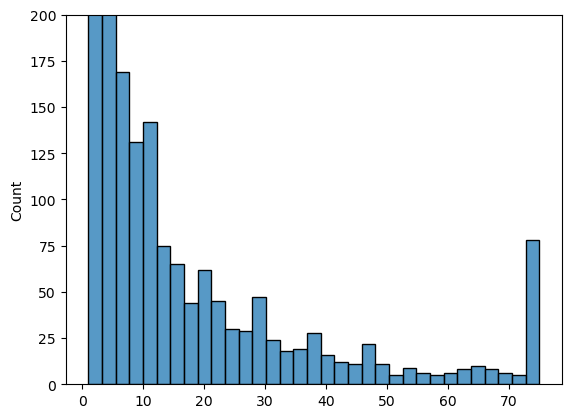

In [36]:
# what do the distribution of track lengths look like?
sns.histplot([len(track) for track in CTRL_tracks])
plt.ylim(0,200)

In [25]:
napari_scale = [float('%.5g' % float(metadata.ImageResolutionX[0])), 
                float('%.5g' % float(metadata.ImageResolutionY[0]))]
### add exaggerated time scale
napari_scale = [1.49E-5, 1.4949e-07, 1.4949e-07]

In [38]:
viewer = napari.Viewer()
# viewer.theme = 'dark'
viewer.add_tracks(tracks, name = 'scaled tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_tracks(filt_tracks, name = 'FILTERED tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_tracks(filt_tracks, name = 'semi filtered tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_image(images, 
                 channel_axis = 1, 
                 colormap= ['green', 'magenta'], 
                 contrast_limits= [[0,6000], [0, 2000]],
                 blending = ['translucent', 'additive'],
                 scale = napari_scale, 
#                 visible=False
                )
animate.add_scale(viewer)
animate.add_time(viewer)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [218]:
false_track_dict = {'expt_IDs':[(3,5)], 
                    'track_IDs':[278], 
                    'timepoint':[9]}

In [41]:
[track for track in CTRL_tracks if track.ID == 278][0]

,ID,t,x,y,z,parent,root,state,generation,dummy,area,major_axis_length,orientation,mean_intensity-1,minor_axis_length,mean_intensity-0
0,278,0,1177.059082,286.395935,0.000000,278,278,5,0,False,2998.0,75.046417,0.070087,0.005436,52.147484,0.036420
1,278,1,1177.801025,300.635437,0.000000,278,278,5,0,False,1890.0,55.156277,0.325159,0.005484,44.125977,0.027937
2,278,2,1178.594360,314.529327,0.073168,278,278,5,0,True,NaN,NaN,NaN,NaN,NaN,NaN
3,278,3,1183.141479,303.622925,0.000000,278,278,5,0,False,1265.0,44.037308,0.178689,0.005582,37.177258,0.039423
4,278,4,1184.811768,301.725800,0.000000,278,278,5,0,False,1291.0,53.806458,0.340097,0.005266,31.416246,0.025499
5,278,5,1184.508545,304.277405,0.000000,278,278,5,0,False,1341.0,53.203552,0.281802,0.005289,32.793076,0.031164
6,278,6,1184.474365,306.523407,0.000000,278,278,5,0,False,1368.0,51.848660,-0.080881,0.005376,34.423252,0.024769
7,278,7,1185.725342,313.318298,0.000000,278,278,5,0,False,1307.0,53.973244,0.037360,0.005413,31.465940,0.026778
8,278,8,1189.535889,309.049927,0.000000,278,278,5,0,False,821.0,44.808521,0.035795,0.005352,24.511690,0.027833
9,278,9,1151.140015,313.874908,0.000000,278,278,5,0,False,3222.0,137.353104,1.019212,0.005276,33.996174,0.013162


In [111]:
t.msd = track_MSD(t)

In [112]:
t.msd

[14.258818177590012,
 13.9165214861898,
 11.816340799426257,
 2.5276365407194885,
 2.5695589507767993,
 2.246262255650398,
 6.909087560531478,
 5.721823437407364,
 38.69784994450261,
 7.183608703911459,
 10.588433105245596,
 9.469709358974683,
 15.603034960041029,
 11.109690219260704,
 7.362153947225394,
 16.601057911553525,
 9.924058674307956,
 8.870992431551262,
 9.043645581525443,
 5.3830361783485925,
 7.115846015469754,
 5.356722879303326,
 4.248113610192879,
 6.7369985123128515,
 3.369751974975239,
 5.927975332729732,
 4.024182725147852,
 3.562406450981011,
 3.3686909318818548,
 2.905764430414523,
 4.825867635970554,
 7.401443176606749,
 6.359744423324894,
 5.356166674565761,
 3.4154325067143443,
 0.8529706962349765,
 1.727870087853187,
 5.640043211822246,
 8.229951992568433,
 0.43404102560858976,
 1.380959844373931,
 0.8787511270111923,
 2.7005176594943,
 1.160601643198009,
 3.5718456458642303,
 1.0411011050630192,
 4.18620845507595,
 2.5707586897241703,
 4.732643306855787,
 8.58

<AxesSubplot:ylabel='Count'>

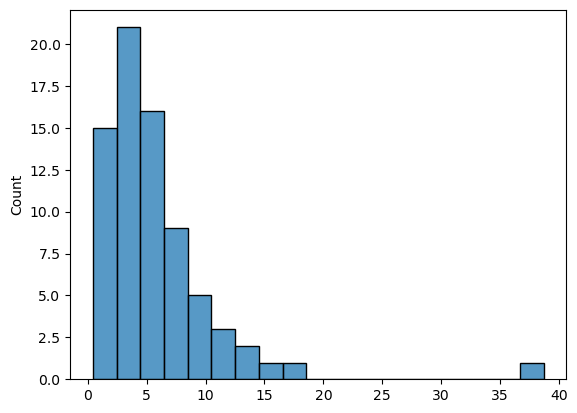

In [113]:
sns.histplot(t.msd)

# plotting the MSD of all tracks

In [114]:
all_msd = [item for sublist in [track_MSD(t) for t in CTRL_tracks] for item in sublist]


(0.0, 200.0)

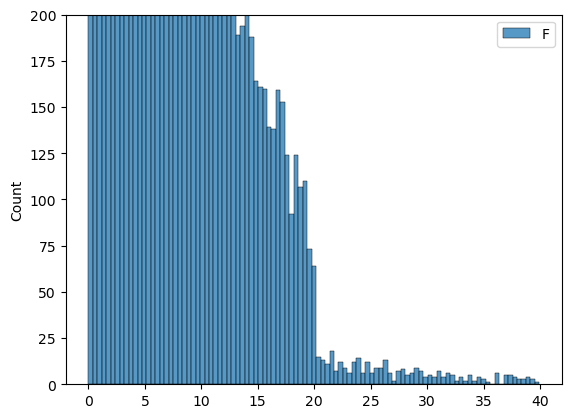

In [117]:
sns.histplot(all_msd)
plt.legend('False')
plt.ylim(0,200)

# Testing a subset of tracks that do not feature a MSD of >20

In [138]:
any([msd < 20 for msd in track_MSD(track)])

True

In [137]:
any(msd > 20 for msd in track_MSD(track))

True

In [144]:
test_set = [track for track in CTRL_tracks if not any(msd > 20 for msd in track_MSD(track))]

In [145]:
test_set_tracks, properties, graph = btrack.utils.tracks_to_napari(test_set, ndim = 2)
test_set_tracks = tools.scale_napari_tracks(test_set_tracks)

In [146]:
len(CTRL_tracks)

2292

In [148]:
len(test_set)

2037

In [149]:
viewer = napari.Viewer()
# viewer.theme = 'dark'
viewer.add_tracks(tracks, name = 'scaled tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_tracks(filt_tracks, name = 'FILTERED tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_tracks(semi_filt_tracks, name = 'semi filtered tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_tracks(test_set_tracks, name = 'testset tracks', 
                  blending='additive', scale = napari_scale)
viewer.add_image(images, 
                 channel_axis = 1, 
                 colormap= ['green', 'magenta'], 
                 contrast_limits= [[0,6000], [0, 2000]],
                 blending = ['translucent', 'additive'],
                 scale = napari_scale, 
#                 visible=False
                )
animate.add_scale(viewer)
animate.add_time(viewer)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


# Conc: 
filtering based on msd does not remove errant tracks... track length seems to be the best characterisation as there is not a lot of cell death so most tracks will be expected to last the duration?

In [156]:
[np.sum(frame) for frame in images[:, 0, ...]]

[57748128478,
 57947242348,
 58387784743,
 57177403507,
 57981525234,
 57328246077,
 56762832794,
 57130412530,
 59751763849,
 54599774151,
 58949811584,
 60968241745,
 60386327943,
 61453002939,
 60804289181,
 61084171305,
 61022537533,
 60807922141,
 60961169206,
 61837271010,
 61876316707,
 61436236836,
 62902888141,
 62815802155,
 60979500731,
 59651597104,
 60947074094,
 61159965542,
 61551176121,
 61435396106,
 60322347876,
 61672104058,
 59272742421,
 61571391472,
 61889912845,
 60879864818,
 61448733151,
 62136533326,
 61164563383,
 61041795506,
 60229742322,
 60329603082,
 60350424178,
 59342093876,
 60566207779,
 59825280852,
 59522818271,
 58485047439,
 59843685984,
 58993804368,
 59649169335,
 57775182830,
 59422409859,
 58663903293,
 58376917346,
 57778610485,
 58714550920,
 56997868378,
 58238892486,
 58418011172,
 57799199531,
 58215069370,
 57712148609,
 56416999367,
 55754717755,
 55692237290,
 55879006692,
 56687487144,
 55464610640,
 55876187043,
 55331264660,
 53774

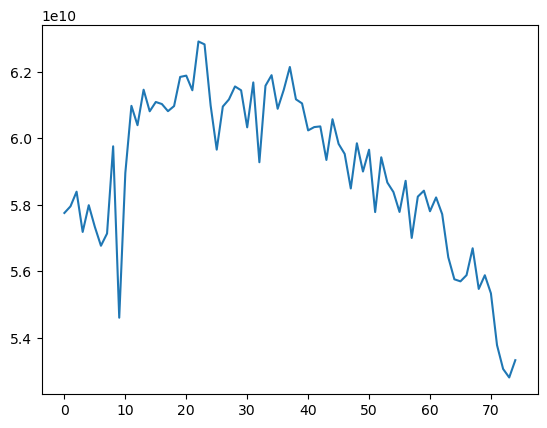

In [157]:
plt.plot([np.sum(frame) for frame in images[:, 0, ...]])

In [158]:
len(filt_CTRL_tracks)

64

In [159]:
len([track for track in CTRL_tracks if 74>len(track) > 34])

193

Rendering frames...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:13<00:00,  6.96it/s]


Rendering frames...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:11<00:00,  7.86it/s]
Traceback (most recent call last):
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/_qt/containers/_base_item_view.py", line 57, in keyPressEvent
    self._root.remove_selected()
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/events/containers/_selectable_list.py", line 89, in remove_selected
    self.selection.add(self[new])
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/events/containers/_set.py", line 68, in add
    self._emit_change(added={value}, removed={})
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/events/containers/_selection.py", line 65, in _emit_change
    self._update_active()
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packag

Rendering frames...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:10<00:00,  8.35it/s]
Traceback (most recent call last):
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_animation/_qt/animation_widget.py", line 121, in _delete_keyframe_callback
    self.animation.key_frames.remove_selected()
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/events/containers/_selectable_list.py", line 89, in remove_selected
    self.selection.add(self[new])
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/events/containers/_set.py", line 68, in add
    self._emit_change(added={value}, removed={})
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/events/containers/_selection.py", line 65, in _emit_change
    self._update_active()
  File "/home/dayn/miniconda3/envs/ae

Rendering frames...


  0%|                                                                                                                                                                                  | 0/91 [00:00<?, ?it/s]


Rendering frames...


  0%|                                                                                                                                                                                  | 0/91 [00:00<?, ?it/s]
